# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import concurrent.futures 
import requests
from pprint import pprint
import json
import os
from citipy import citipy
import random
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

CITIES_TOT = 1400
SETS_NUM = 50
API_KEY = os.environ.get('API_WEATHER_KEY')


In [2]:
random.seed(42)
ran_lat= [random.uniform(-90,90) for _ in range(CITIES_TOT)]
ran_long = [random.uniform(-180,180) for _ in range(CITIES_TOT)]
dd = list(zip(ran_lat,ran_long))
dd

[(25.096823722419074, -71.58556994896081),
 (-85.49806405991995, -162.81019921721355),
 (-40.494722693558536, -28.86280424876051),
 (-49.8220671332119, 105.80367911019772),
 (42.56481854952224, -15.439098010878467),
 (31.80590773612404, -140.0911576955946),
 (70.59232218687217, 145.85287883831944),
 (-74.35101012670509, 34.8260554148209),
 (-14.054072456651326, -174.08327320587802),
 (-84.63650050114734, 5.535262875386195),
 (-50.6451645353514, -92.9022716084424),
 (0.9639518586052276, -128.31233751134639),
 (-85.22352545690455, -25.473998482799857),
 (-54.209222876403274, 41.33144979934224),
 (26.97919880031418, -93.39687402964432),
 (8.089466508579008, -30.03566572492568),
 (-50.320688032674596, 59.17366862712328),
 (16.067823097663563, -149.17897620458575),
 (55.697482202008786, 170.87561674279982),
 (-88.83022325794902, -155.63544375281543),
 (55.04746532990541, 9.38140031598138),
 (35.66509109788083, 2.6379707687231644),
 (-28.754907026761465, 175.7993348147283),
 (-62.01369003387

## Generate Cities List

In [3]:
cities = []
def generate_cities(lat):
    for rows in lat:
        city = citipy.nearest_city(rows[0],rows[1])
        cities.append(city.city_name)

generate_cities(dd)

final_cities = list(set(cities))
final_cities_clean = [final_cities[i:i+SETS_NUM] for i in range(0, len(final_cities), SETS_NUM)]
len(final_cities_clean)

13

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
start = time.perf_counter()
json_data = []
print("""Beginning Data Retrieval     
---------------------------------------""")
def get_weather_data(cities,set_num):
    
    URL = "https://api.openweathermap.org/data/2.5/weather?"
    for enum,city in enumerate(cities,start=1):  
        parameters = {
            'q' : city,
            'appid' : API_KEY,
            'units' : "imperial"
            

        }
        try:           
            data_request = requests.get(URL,params =parameters ).json()
            print(f"Processing Record {enum} of {set_num}| {data_request['name']}")            
        except:
            print("City not found. Skipping...")
        finally:
            json_data.append(data_request)

    
    
for n in range(len(final_cities_clean)):
    get_weather_data(final_cities_clean[n],n+1)
    time.sleep(0.10)        

 
print("""-----------------------------
Data Retrieval Complete      
-----------------------------""")

finish = time.perf_counter()
print(f'Finished in {round((finish-start)/60, 2)} min(s)')

Beginning Data Retrieval     
---------------------------------------
Processing Record 1 of 1| Shingū
Processing Record 2 of 1| Whitehorse
Processing Record 3 of 1| Lima
Processing Record 4 of 1| Abu Samrah
Processing Record 5 of 1| Bereda
City not found. Skipping...
Processing Record 7 of 1| Gao
Processing Record 8 of 1| Lawton
Processing Record 9 of 1| Albany
Processing Record 10 of 1| Batticaloa
Processing Record 11 of 1| Adrar
Processing Record 12 of 1| Leningradskiy
Processing Record 13 of 1| Mataura
Processing Record 14 of 1| Baharly
Processing Record 15 of 1| Narsaq
Processing Record 16 of 1| Boguchany
Processing Record 17 of 1| Kupang
Processing Record 18 of 1| Ponta Delgada
Processing Record 19 of 1| Ōmachi
Processing Record 20 of 1| At-Bashi
Processing Record 21 of 1| Benghazi
Processing Record 22 of 1| Muros
Processing Record 23 of 1| Aklavik
Processing Record 24 of 1| Brae
Processing Record 25 of 1| Jiayuguan City
Processing Record 26 of 1| Mayo
Processing Record 27 of 1| 

Processing Record 31 of 5| Carnarvon
Processing Record 32 of 5| Hobart
Processing Record 33 of 5| Vostok
Processing Record 34 of 5| Mehamn
Processing Record 35 of 5| Vao
Processing Record 36 of 5| Rivière-du-Loup
Processing Record 37 of 5| Yelbarga
Processing Record 38 of 5| Eisenach
Processing Record 39 of 5| Rognan
Processing Record 40 of 5| Hay River
Processing Record 41 of 5| Acarí
Processing Record 42 of 5| Celestún
Processing Record 43 of 5| Three Hills
Processing Record 44 of 5| Kahului
Processing Record 45 of 5| Itaituba
City not found. Skipping...
Processing Record 47 of 5| Barrow
Processing Record 48 of 5| Aksarka
Processing Record 49 of 5| São João da Barra
Processing Record 50 of 5| Olafsvik
Processing Record 1 of 6| Darnah
Processing Record 2 of 6| Bubaque
Processing Record 3 of 6| Lorengau
Processing Record 4 of 6| Jericho
Processing Record 5 of 6| Ossora
Processing Record 6 of 6| Nanortalik
City not found. Skipping...
Processing Record 8 of 6| Provideniya
Processing Reco

Processing Record 11 of 10| Dali
Processing Record 12 of 10| Chumikan
City not found. Skipping...
Processing Record 14 of 10| Saldanha
Processing Record 15 of 10| Sabang
Processing Record 16 of 10| Luanda
Processing Record 17 of 10| Mahébourg
Processing Record 18 of 10| Sisimiut
Processing Record 19 of 10| Chase
Processing Record 20 of 10| Muş Province
Processing Record 21 of 10| Alihe
City not found. Skipping...
Processing Record 23 of 10| Valera
Processing Record 24 of 10| Rawson
Processing Record 25 of 10| Darhan
Processing Record 26 of 10| Bonavista
Processing Record 27 of 10| Tomatlán
Processing Record 28 of 10| Agirish
City not found. Skipping...
Processing Record 30 of 10| Bambous Virieux
Processing Record 31 of 10| Ecséd
Processing Record 32 of 10| Thompson
Processing Record 33 of 10| Lázaro Cárdenas
Processing Record 34 of 10| Torbay
Processing Record 35 of 10| Bedēsa
Processing Record 36 of 10| Port Lincoln
Processing Record 37 of 10| George Town
Processing Record 38 of 10| B

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_name = []
latitude = []
longitude =  []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
for data in json_data:
    try:
        city_name.append(data['name'])
        latitude.append(data['coord']['lat'])
        longitude.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
    except:
        pass
    

    
df = pd.DataFrame({
    'City':city_name,
    'Lat':latitude,
    'Lng':longitude,
    'Max Temp':max_temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date':date
})



df.sort_values(by = 'City',ascending = True,inplace = True)
df.drop_duplicates(inplace=True)

df.reset_index(drop = True,inplace = True)
df = df.dropna()

#Exporting to CSV

df.to_csv("../output_data/weather.csv",encoding='utf-8',index=False)

In [6]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,20.767923,9.480328,63.161220,69.619308,47.579235,8.117996,1.602667e+09
std,32.814780,90.665953,19.928317,23.543617,38.491913,5.447392,6.730939e+01
min,-54.800000,-179.170000,10.400000,1.000000,0.000000,0.110000,1.602666e+09
25%,-6.640000,-70.230000,48.200000,57.000000,5.000000,4.000000,1.602667e+09
50%,24.470000,14.430000,68.000000,77.000000,40.000000,6.930000,1.602667e+09
75%,48.930000,82.180000,79.430000,87.000000,90.000000,11.140000,1.602667e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,38.030000,1.602667e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
df_copy = df.copy()
df_humidity_100 = df_copy.loc[df['Humidity']>=100]
df_humidity_100.index

Int64Index([ 29,  70, 116, 150, 162, 164, 179, 184, 185, 199, 256, 332, 334,
            356, 366, 371, 379, 422, 457, 478, 489, 527],
           dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df_copy.drop(axis=0, index=df_humidity_100.index,inplace=False)
clean_city_data.reset_index(drop = True,inplace = True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aabenraa,55.04,9.42,50.00,75,20,12.75,DK,1602666706
1,Abbeville,50.10,1.83,51.01,82,54,13.51,FR,1602666602
2,Aberystwyth,52.42,-4.08,50.00,99,8,1.99,GB,1602666689
3,Abu Dhabi,24.47,54.37,95.00,15,0,9.17,AE,1602666671
4,Abu Samrah,35.30,37.18,80.08,38,0,7.61,SY,1602666551
...,...,...,...,...,...,...,...,...,...
522,Zirándaro de los Chávez,18.45,-100.98,75.24,84,60,1.77,MX,1602666648
523,Zyryanovsk,49.74,84.27,49.80,50,1,1.88,KZ,1602666578
524,Ōmachi,36.50,137.87,62.01,79,48,4.00,JP,1602666513
525,Şahbuz,39.41,45.57,69.80,37,0,4.70,AZ,1602666667


In [9]:
clean_city_data['City'].value_counts()

Luanda           1
Hithadhoo        1
Half Moon Bay    1
Alpena           1
Ilulissat        1
                ..
Pangnirtung      1
Bandarbeyla      1
Nobres           1
Palu             1
Hāgere Selam     1
Name: City, Length: 527, dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

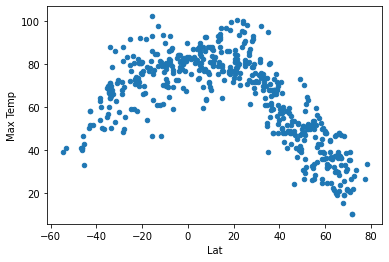

In [10]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Max Temp' )
plt.show()

## Latitude vs. Humidity Plot

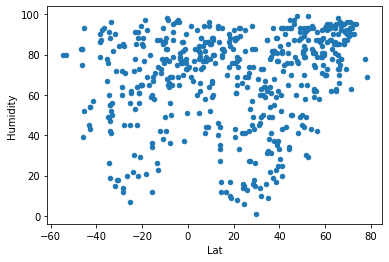

In [11]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Humidity' )
plt.show()

## Latitude vs. Cloudiness Plot

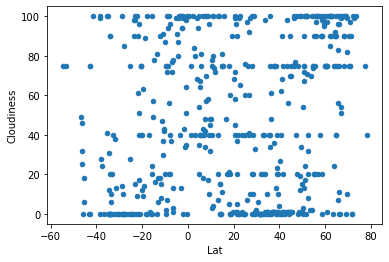

In [12]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Cloudiness' )
plt.show()

## Latitude vs. Wind Speed Plot

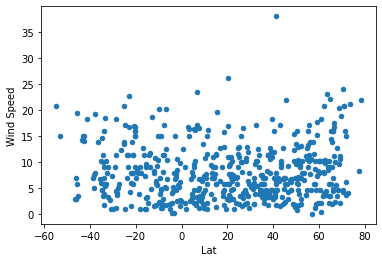

In [13]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Wind Speed' )
plt.show()

## Linear Regression

In [14]:
north_hem = clean_city_data.copy()
north_hem = north_hem.loc[north_hem['Lng'] > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

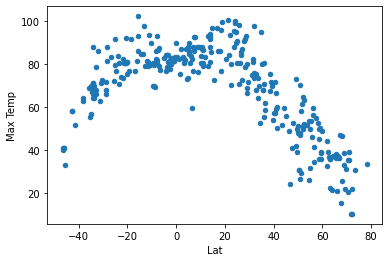

In [15]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

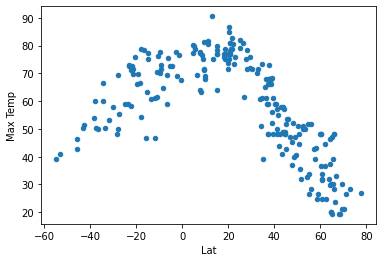

In [16]:
south_hem = clean_city_data.copy()
south_hem = south_hem.loc[south_hem['Lng'] < 0]
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

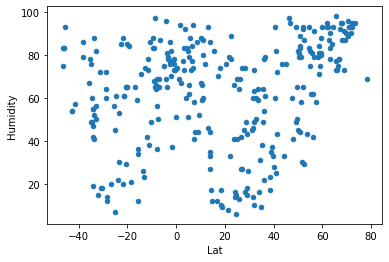

In [17]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

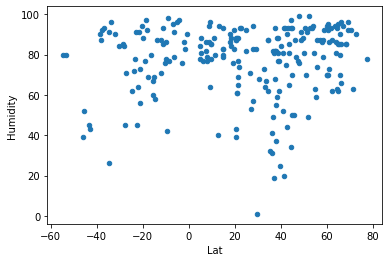

In [18]:
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

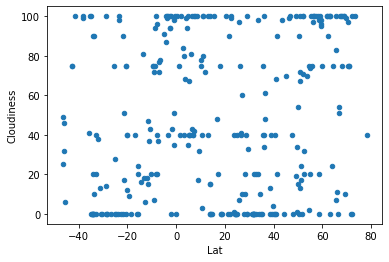

In [19]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

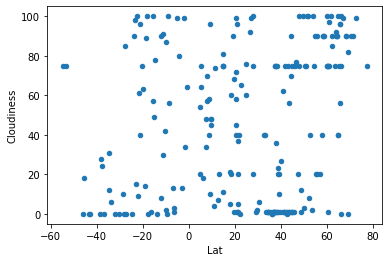

In [20]:
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

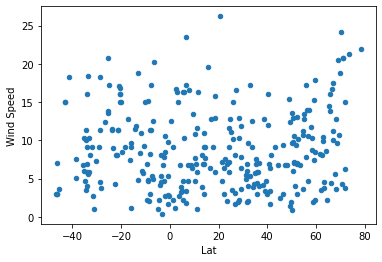

In [21]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

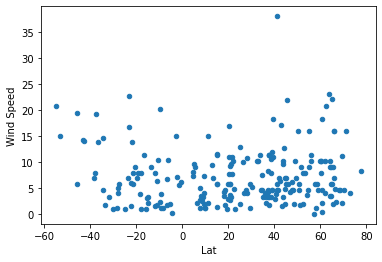

In [22]:
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Wind Speed')
plt.show()